In [1]:
%matplotlib widget

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_interactions as pli

In [43]:
import nrrd
import numpy as np
from skimage.metrics import structural_similarity as compare_ssim

# Load the NRRD volumes
volume4, _ = nrrd.read(r'/home/jericho/Documents/2 CT - 4 frames Volume Sequence by SeriesTime 0.nrrd')
volume1, _ = nrrd.read(r'/home/jericho/Documents/30 0.2mm Pelvic Br40.nrrd')

/tmp/ipykernel_105756/1437350201.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


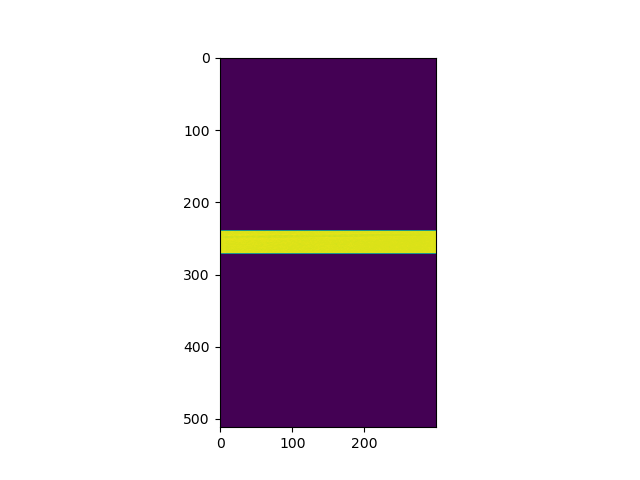

In [44]:
plt.figure()
pli.hyperslicer(volume4)

In [52]:
CT_4 = volume4.T[80:150, 200:320, 200:300] + 1000

CT_1 = volume1.T[600:882, 170:290, 210:310] + 1000
CT_1 = (CT_1[::3] + CT_1[1::3]  + CT_1[2::3]) /3
CT_1 = (CT_1[:,::2] + CT_1[:,1::2]) /2

CNR for bladder in PCCT: 3.212501087011755
CNR for bladder in EICT: 0.42820557075318544


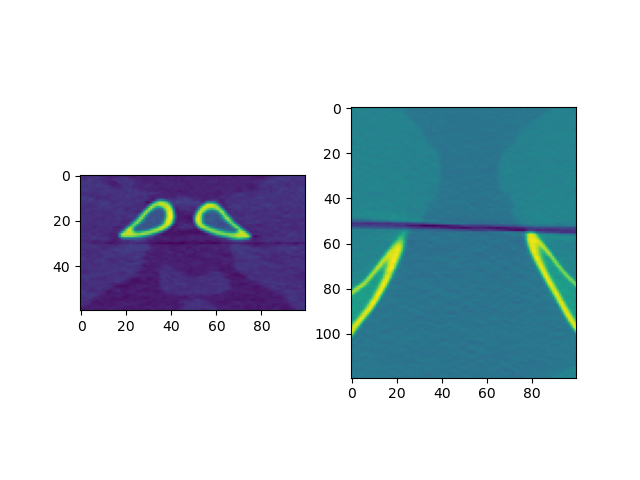

In [19]:
plt.figure()
plt.subplot(121)
pli.hyperslicer(CT_1)#[39:63,17:25,28:45])
plt.subplot(122)
pli.hyperslicer(CT_4)#[39:47,28:48,33:53])

bladder_pcct = CT_1[39:45,17:25,28:45]
bladder_eict = CT_4[39:41,28:48,33:53]

ref_pcct = CT_1[46:61,:5,:50]
ref_eict = CT_4[42:46,:5,:50]

# compute the contrast to noise ratio in the bladder for the pcct and eict
mean_bladder_pcct = np.mean(bladder_pcct)
mean_bladder_eict = np.mean(bladder_eict)

std_bladder_pcct = np.std(bladder_pcct)
std_bladder_eict = np.std(bladder_eict)

mean_muscle_pcct = np.mean(ref_pcct)
mean_muscle_eict = np.mean(ref_eict)

std_muscle_pcct = np.std(ref_pcct)
std_muscle_eict = np.std(ref_eict)

CNR_bladder_pcct = np.abs(mean_bladder_pcct - mean_muscle_pcct) / (std_bladder_pcct**2)**0.5
CNR_bladder_eict = np.abs(mean_bladder_eict - mean_muscle_eict) / (std_bladder_eict**2)**0.5

print(f'CNR for bladder in PCCT: {CNR_bladder_pcct}')
print(f'CNR for bladder in EICT: {CNR_bladder_eict}')

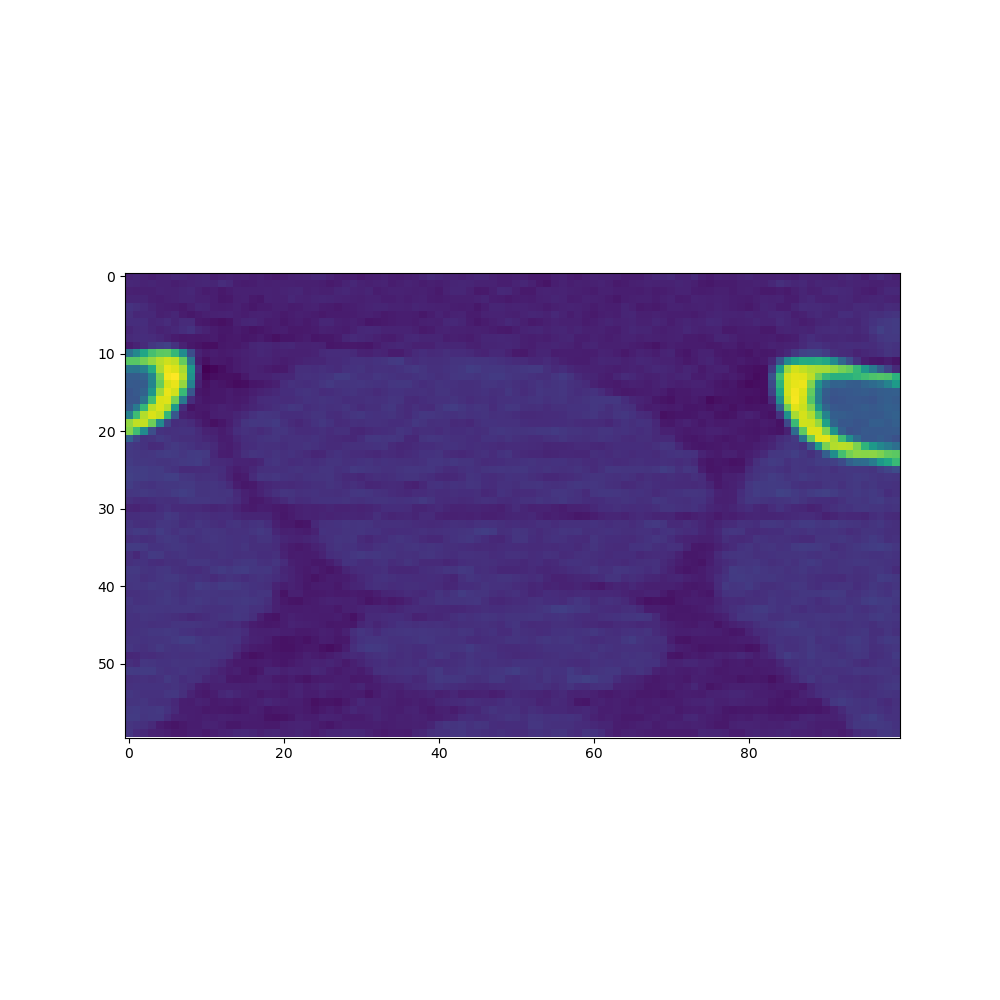

In [58]:
# plt.figure()
mask_bladder1 = pli.image_segmenter(CT_1[47])
display(mask_bladder1)

In [59]:
bladder_seg1 = mask_bladder1.mask

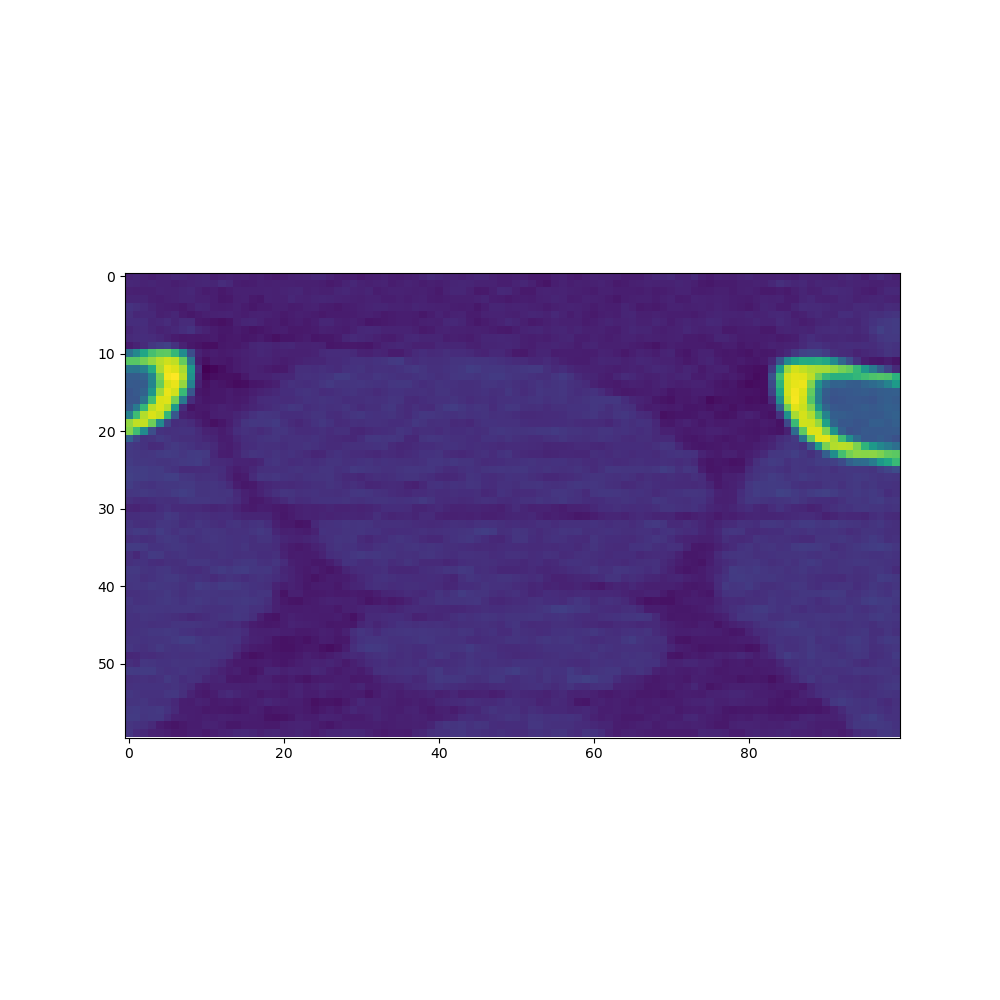

In [60]:
mask_bg1 = pli.image_segmenter(CT_1[47])
display(mask_bg1)

In [61]:
bg_seg1 = mask_bg1.mask

In [83]:
# apply a gaussian filter to the CT_1 image
from scipy.ndimage import gaussian_filter

CT_1_gauss = gaussian_filter(np.mean(CT_1[46:48],axis=0) , sigma=1.5)


contrast = np.mean(CT_1_gauss[bladder_seg1.astype(bool)]) - np.mean(CT_1_gauss[bg_seg1.astype(bool)])
noise = np.std(CT_1_gauss[bladder_seg1.astype(bool)])

CNR = contrast / noise
print(f'CNR for bladder in PCCT: {CNR} and contrast: {contrast} and noise: {noise}')

CNR for bladder in PCCT: 13.606209876829354 and contrast: 85.55813407584094 and noise: 6.288168038738095


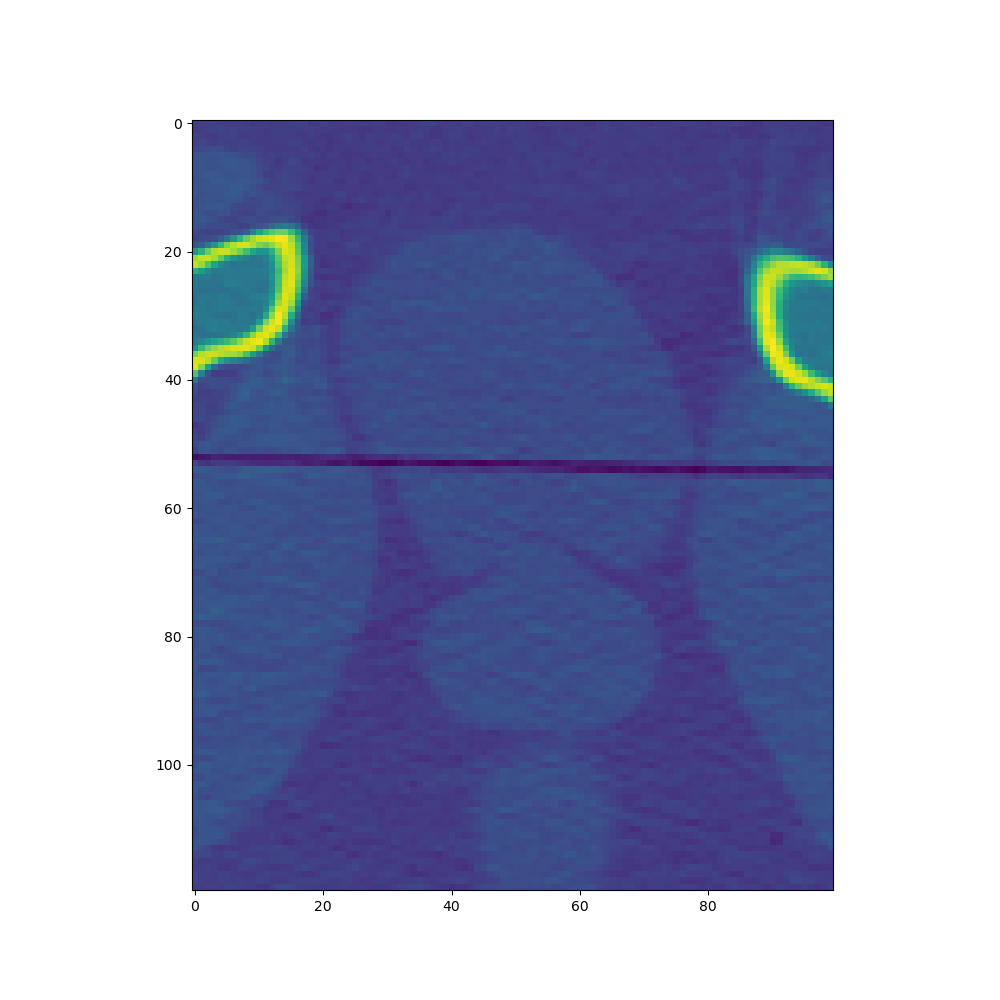

In [63]:
# plt.figure()
mask_bladder = pli.image_segmenter(CT_4[40])
display(mask_bladder)

In [64]:
bladder_seg = mask_bladder.mask

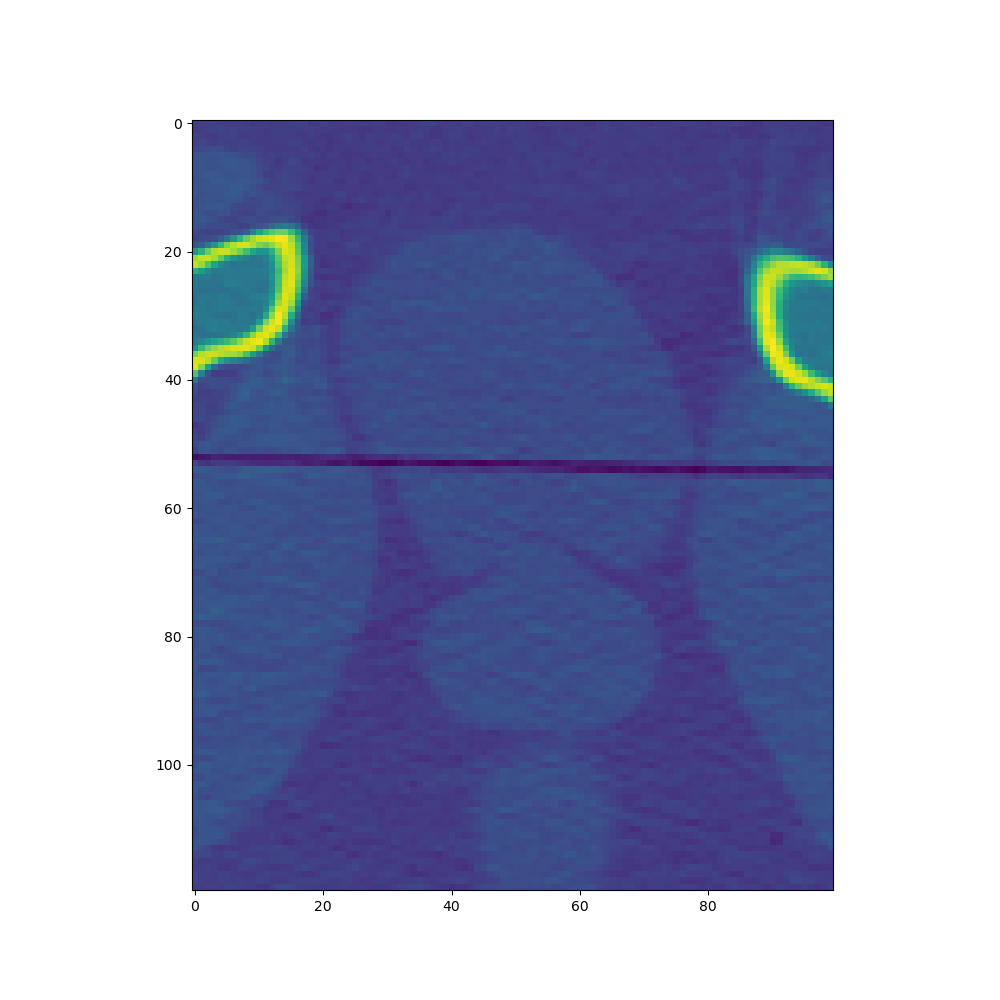

In [65]:
mask_bg = pli.image_segmenter(CT_4[40])
display(mask_bg)

In [81]:
bg_seg = mask_bg.mask

# apply a gaussian filter to the CT_1 image
from scipy.ndimage import gaussian_filter

CT_4_gauss = gaussian_filter(CT_4[40], sigma=1.5)

contrast = np.mean(CT_4_gauss[bladder_seg.astype(bool)]) - np.mean(CT_4_gauss[bg_seg.astype(bool)])
noise = np.std(CT_4_gauss[bladder_seg.astype(bool)])

CNR = contrast / noise
print(f'CNR for bladder in EICT: {CNR} and contrast: {contrast} and noise: {noise}')

CNR for bladder in EICT: 13.799366127661727 and contrast: 84.84126913820842 and noise: 6.148200457420908


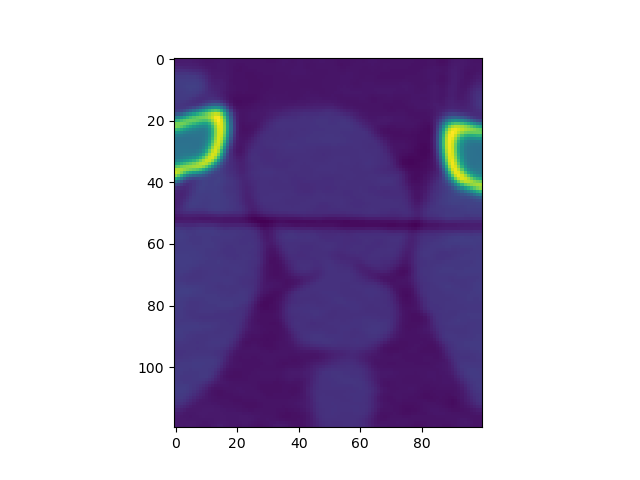

In [67]:
plt.figure()
plt.imshow(CT_4_gauss)

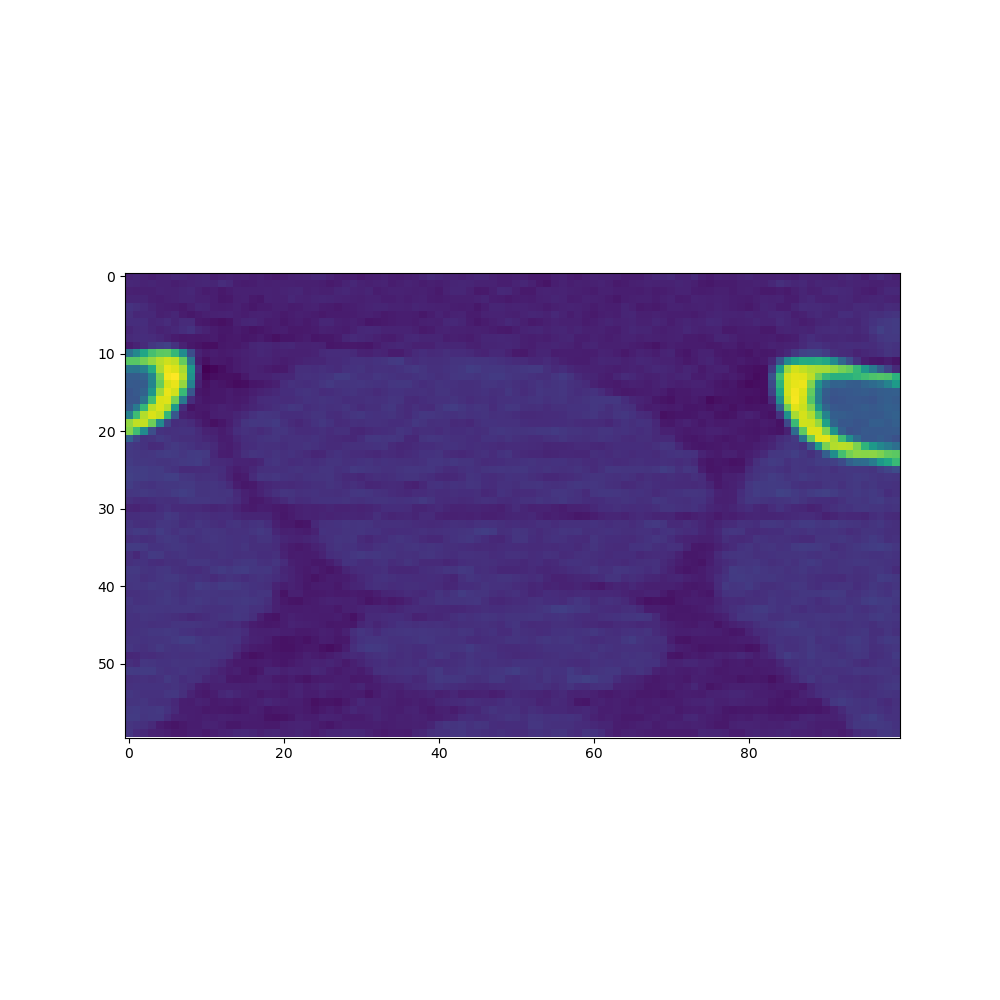

In [72]:
## Segment the prostate

mask_prostate1 = pli.image_segmenter(CT_1[47])
display(mask_prostate1)

In [74]:
prostate_seg1 = mask_prostate1.mask

In [82]:
contrast = np.mean(CT_1_gauss[prostate_seg1.astype(bool)]) - np.mean(CT_1_gauss[bg_seg1.astype(bool)])
noise = np.std(CT_1_gauss[prostate_seg1.astype(bool)])

CNR = contrast / noise
print(f'CNR for prostate in PCCT: {CNR} and contrast: {contrast} and noise: {noise}')

CNR for prostate in PCCT: 17.716170690392897 and contrast: 90.11088262888995 and noise: 5.086363424899444


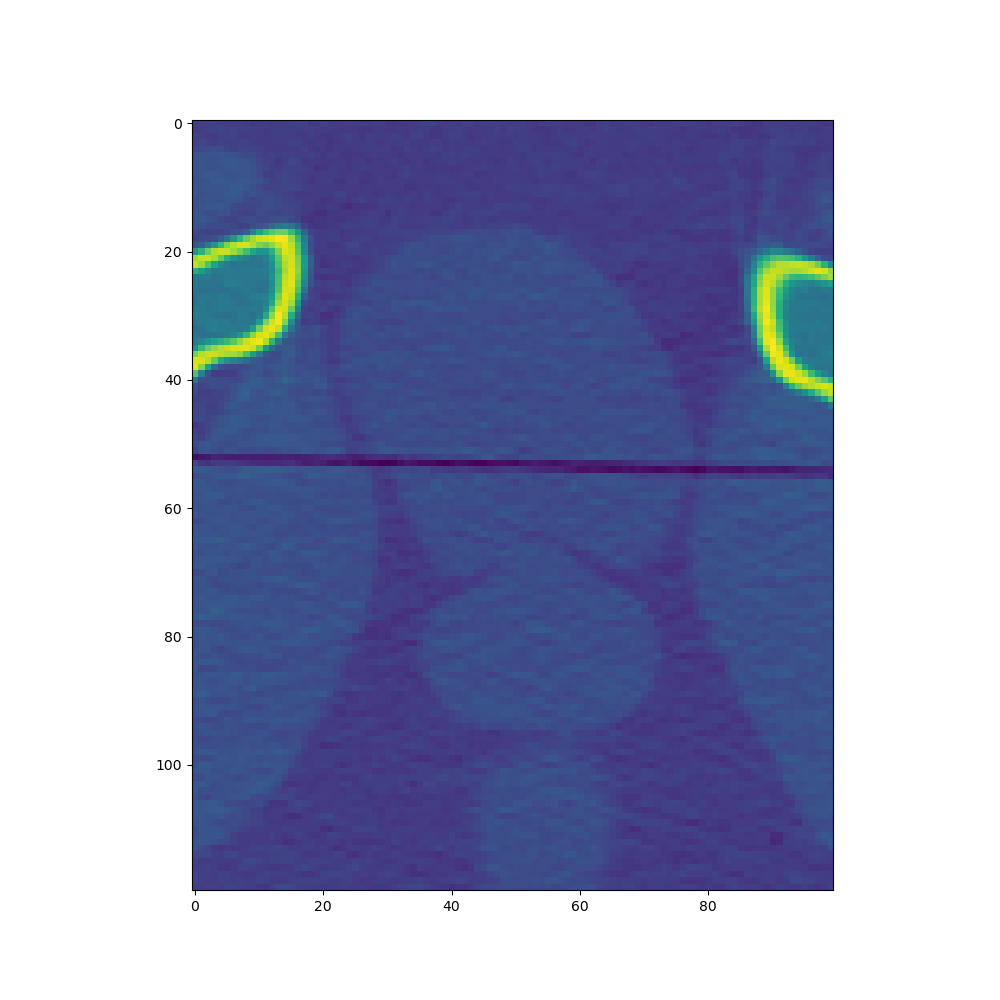

In [78]:
# segment the prostate in the EICT
mask_prostate = pli.image_segmenter(CT_4[40])
display(mask_prostate)

In [79]:

prostate_seg = mask_prostate.mask

In [80]:
contrast = np.mean(CT_4_gauss[prostate_seg.astype(bool)]) - np.mean(CT_4_gauss[bg_seg.astype(bool)])
noise = np.std(CT_4_gauss[prostate_seg.astype(bool)])

CNR = contrast / noise
print(f'CNR for prostate in EICT: {CNR}')

CNR for prostate in EICT: 20.31460337971465
